In [23]:
#### import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline


In [24]:
#### read data 
order_train = pd.read_csv('order_products__train.csv')
order_prior = pd.read_csv('order_products__prior.csv')
orders_data = pd.read_csv('orders.csv')
products_data = pd.read_csv('products.csv')
aisle_data = pd.read_csv('aisles.csv')
departments_data = pd.read_csv('departments.csv')



In [25]:
#### look at data
print(orders_data.head(),'\n')
print(order_train.head(),'\n')
print(order_prior.head())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0   

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1 

   order_id  product_id  add_to_cart_orde

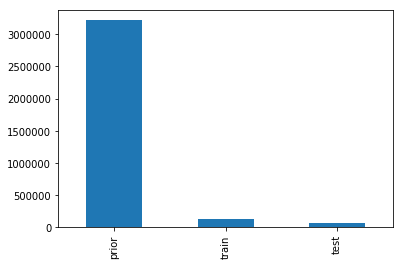

In [26]:
### count no.of rows in each data

cnt_rows = orders_data['eval_set'].value_counts()
cnt_rows.plot(kind ='bar')

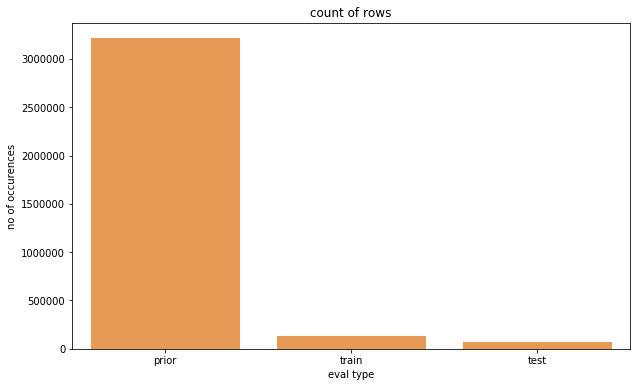

In [27]:
### plot barplot to see count
plt.figure(figsize = (10,6))
sns.barplot(cnt_rows.index, cnt_rows.values, alpha = 0.8, color = color[1])
plt.ylabel('no of occurences')
plt.xlabel('eval type')
plt.title('count of rows')
plt.show()

In [28]:
#### remove duplicate entries and group them by unique user_id
cnt_rows = orders_data.groupby('eval_set')['user_id'].nunique()
cnt_rows

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

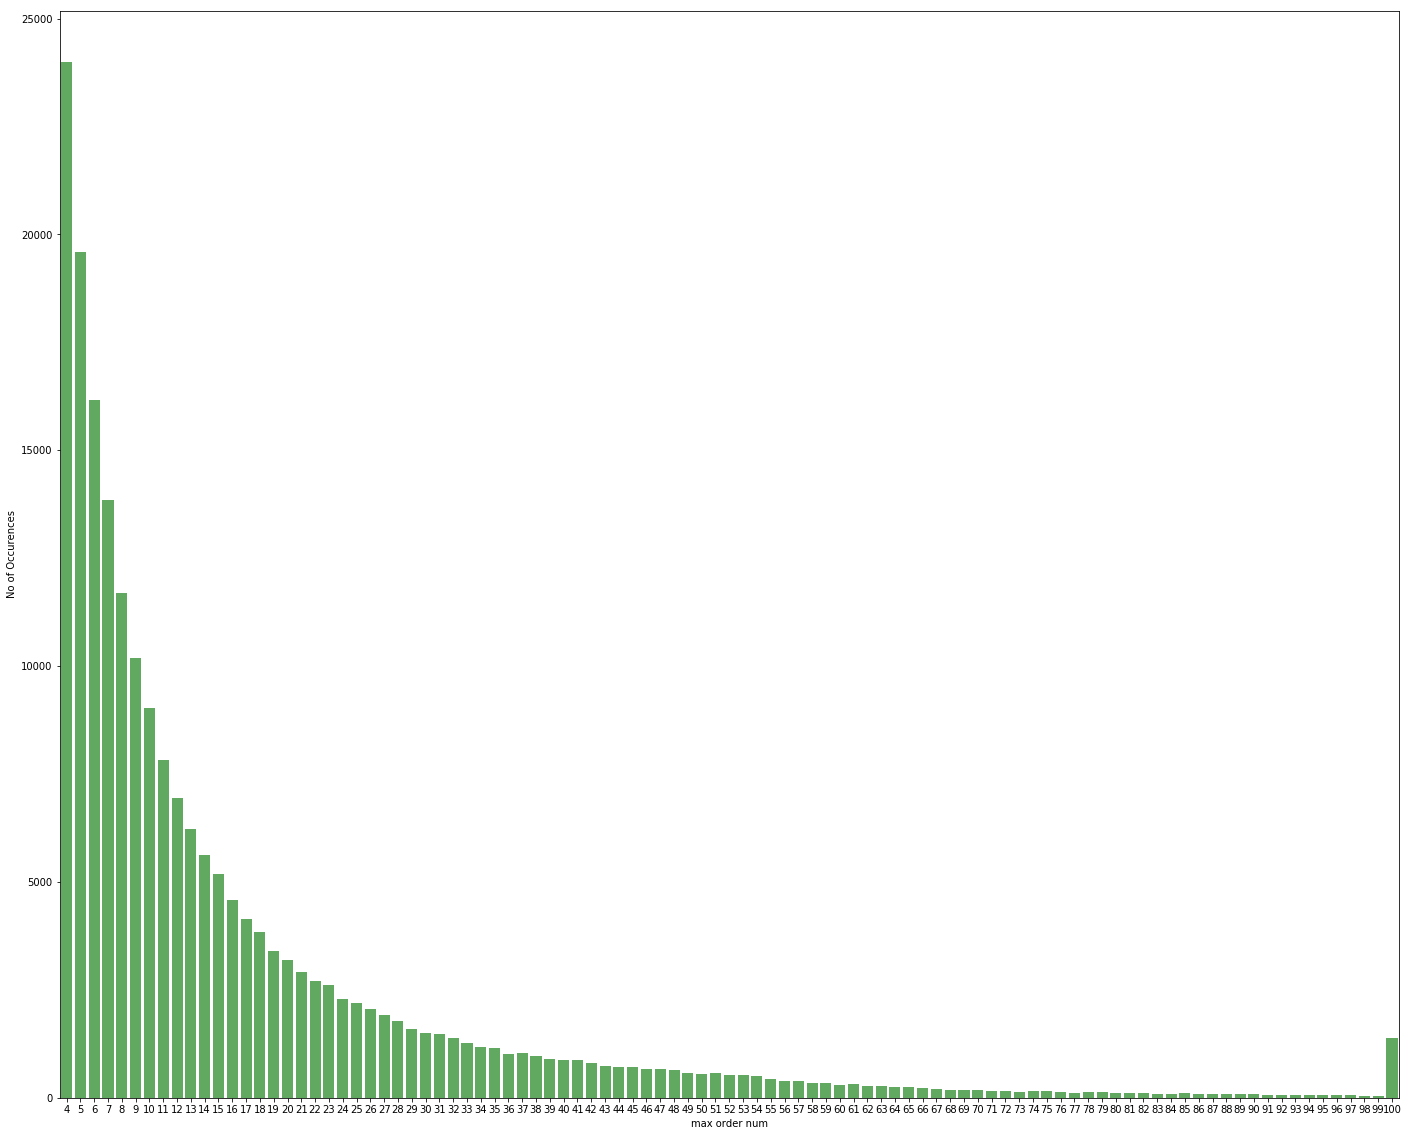

In [45]:
#### data claim to see 4 to 100 orders per customer atleast
cnt_orders = orders_data.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_orders = cnt_orders.order_number.value_counts()
plt.figure(figsize = (24,20))
sns.barplot(cnt_orders.index,cnt_orders.values, alpha = 0.8, color = color[2])
plt.ylabel("No of Occurences", fontsize = 10)
plt.xlabel("max order num", fontsize = 10)

plt.show()


In [ ]:
### from above fig no order less than 4 , claim is true

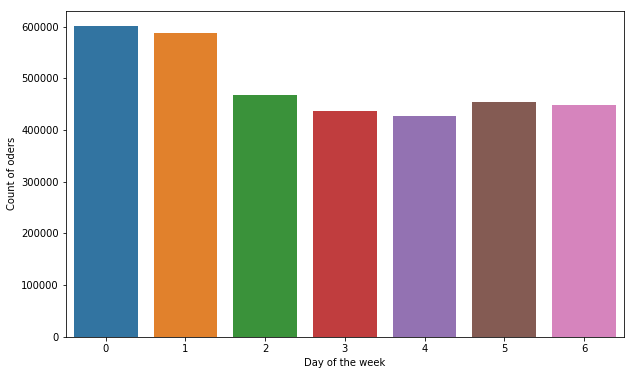

In [47]:
### order fequencies by daily and hourly
plt.figure(figsize = (10,6))
sns.countplot(x = 'order_dow',data = orders_data)
plt.ylabel("Count of oders", fontsize = 10)
plt.xlabel("Day of the week", fontsize = 10)
plt.show()

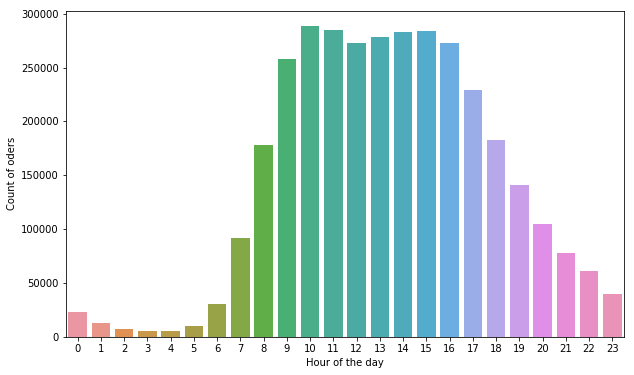

In [48]:
### order fequencies by daily and hourly
plt.figure(figsize = (10,6))
sns.countplot(x = 'order_hour_of_day',data = orders_data)
plt.ylabel("Count of oders", fontsize = 10)
plt.xlabel("Hour of the day", fontsize = 10)
plt.show()

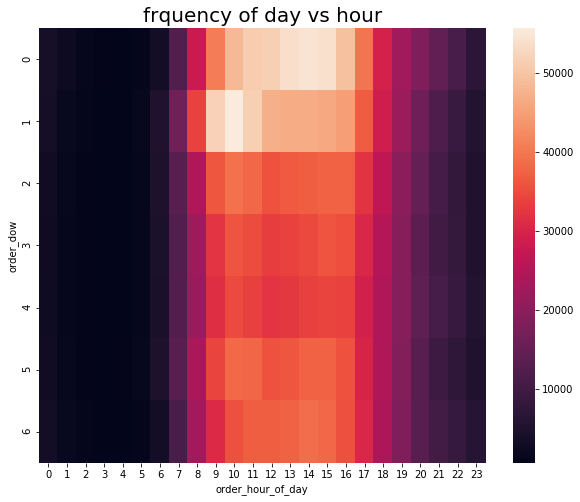

In [52]:
### combine both daily nd hourly orders
duration_df = orders_data.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
duration_df= duration_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize = (10,8))
sns.heatmap(duration_df)
plt.title("frquency of day vs hour", fontsize = 20)
plt.show()

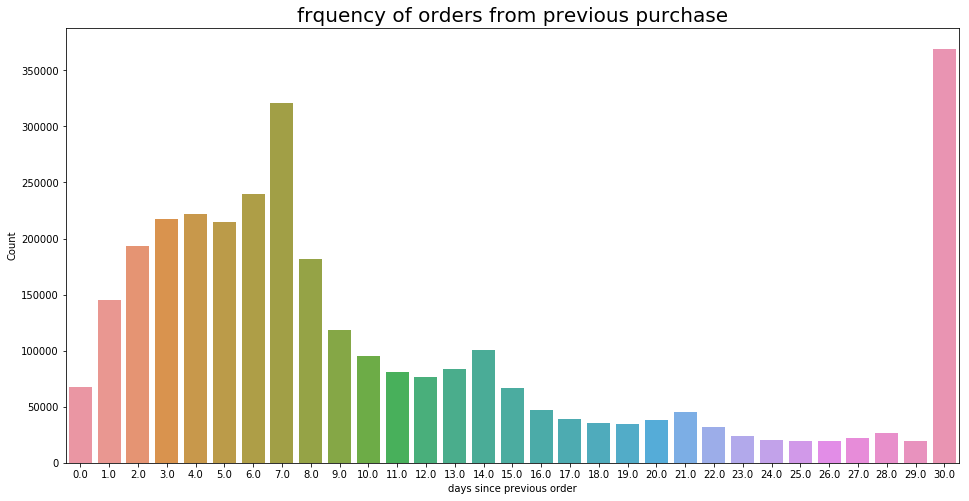

In [54]:
### time interval between orders made by the customer
plt.figure(figsize = (16,8))
sns.countplot(x = 'days_since_prior_order',data = orders_data)
plt.xlabel("days since previous order", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("frquency of orders from previous purchase", fontsize = 20)
plt.show()

In [ ]:
### from above fig it is clearly visible that customers tend to order weekly 
####  (spike at day7) and montly(spike at day 31) , and lowest during month last week(22-29 day)


In [58]:
#### lets look at reorder prcentage in each data set like prior and train data , as our aim is to figure reorder

order_prior.reordered.sum()/order_prior.shape[0]

0.5896974667922161

In [59]:
order_train.reordered.sum()/order_train.shape[0]

0.5985944127509629

In [ ]:
### so around 59% in orders are reordered products


In [63]:
### lets look at no reorderd products
order_prod_df = order_train.groupby('order_id')['reordered'].aggregate('sum').reset_index()
order_prod_df['reordered'].ix[order_prod_df['reordered']>1]=1
order_prod_df.reordered.value_counts()/order_prod_df.shape[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


1    0.93444
0    0.06556
Name: reordered, dtype: float64

In [64]:
### lets look at no reorderd products
order_prod_df = order_prior.groupby('order_id')['reordered'].aggregate('sum').reset_index()
order_prod_df['reordered'].ix[order_prod_df['reordered']>1]=1
order_prod_df.reordered.value_counts()/order_prod_df.shape[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [ ]:
### around 12% in prior and 6.5% in train are not reordered 

In [92]:
print(products_data.head(),'\n')
print(aisle_data.head(), '\n')
print(departments_data.head(),'\n')
print(order_product_df.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13   

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation 

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol 

   

In [68]:
### merge product data with prior_orders data
order_product_df = pd.merge(order_prior, products_data, on = 'product_id', how = 'left')
order_product_df = pd.merge(order_product_df, aisle_data, on = 'aisle_id', how = 'left')
order_product_df = pd.merge(order_product_df, departments_data, on = 'department_id', how = 'left')
order_product_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [69]:
### each product frequency
cnt_frq_prod = order_product_df['product_name'].value_counts().reset_index().head(15)
cnt_frq_prod.columns = ['product_name','frequency']
cnt_frq_prod

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


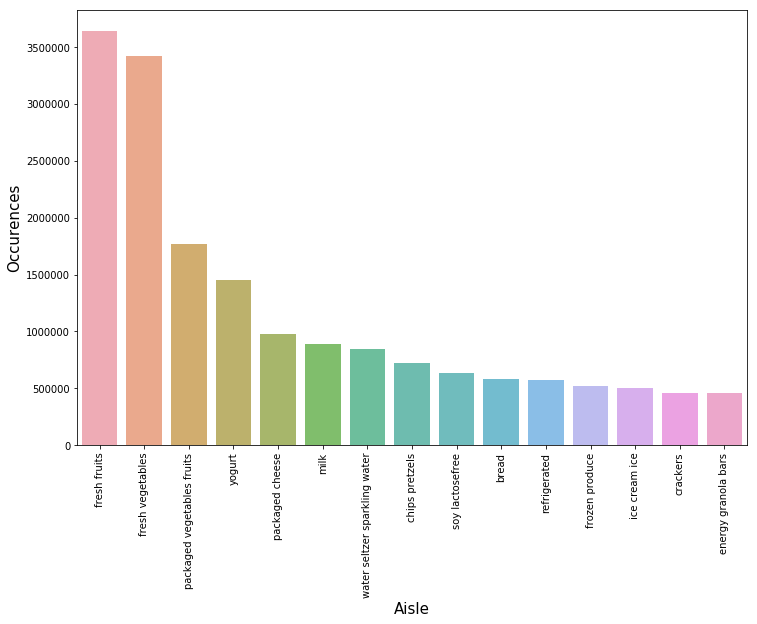

In [80]:
### plot aisles data with thier count
aisles_cnt = order_product_df['aisle'].value_counts().head(15)
plt.figure(figsize = (12,8))
sns.barplot(aisles_cnt.index , aisles_cnt.values,alpha = 0.8)
plt.xlabel("Aisle", fontsize = 15)
plt.ylabel("Occurences", fontsize =15)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
### fruit and vegetables are top aisles

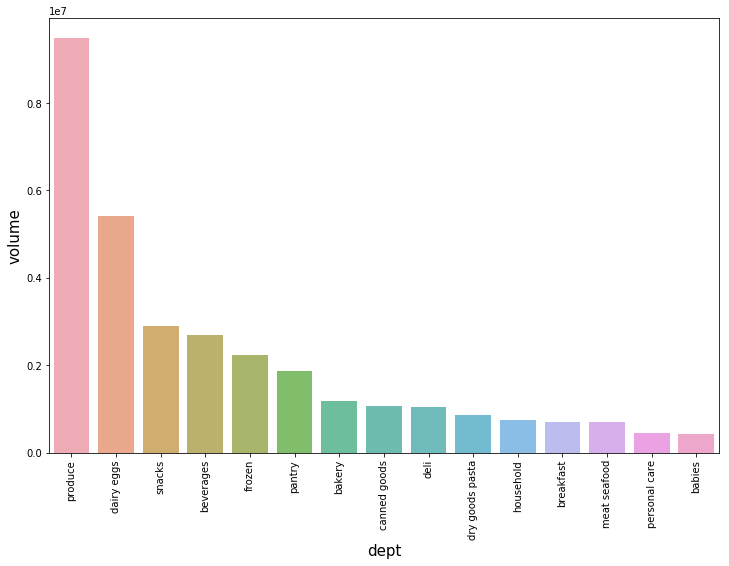

In [82]:
#### lets look at department wise distribution
aisles_cnt = order_product_df['department'].value_counts().head(15)
plt.figure(figsize = (12,8))
sns.barplot(aisles_cnt.index , aisles_cnt.values,alpha = 0.8)
plt.xlabel("dept", fontsize = 15)
plt.ylabel("volume", fontsize =15)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
### produce is the largest dept

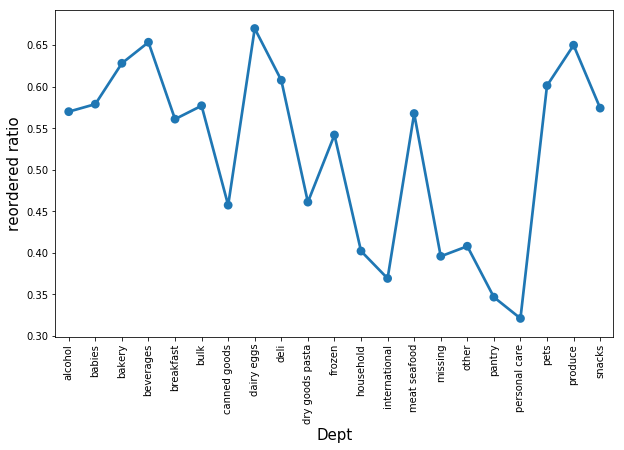

In [85]:
### dept wise reorder ratio

dept_reorder_ratio = order_product_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()
plt.figure(figsize = (10,6))
sns.pointplot(dept_reorder_ratio['department'].values, dept_reorder_ratio['reordered'].values, alpha = 0.8)
plt.xlabel("Dept", fontsize = 15)
plt.ylabel("reordered ratio", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#### persoanl care has lowest reorder ratio(<35%) ,diary eggs and produce has highest reorder ratio(>65%)

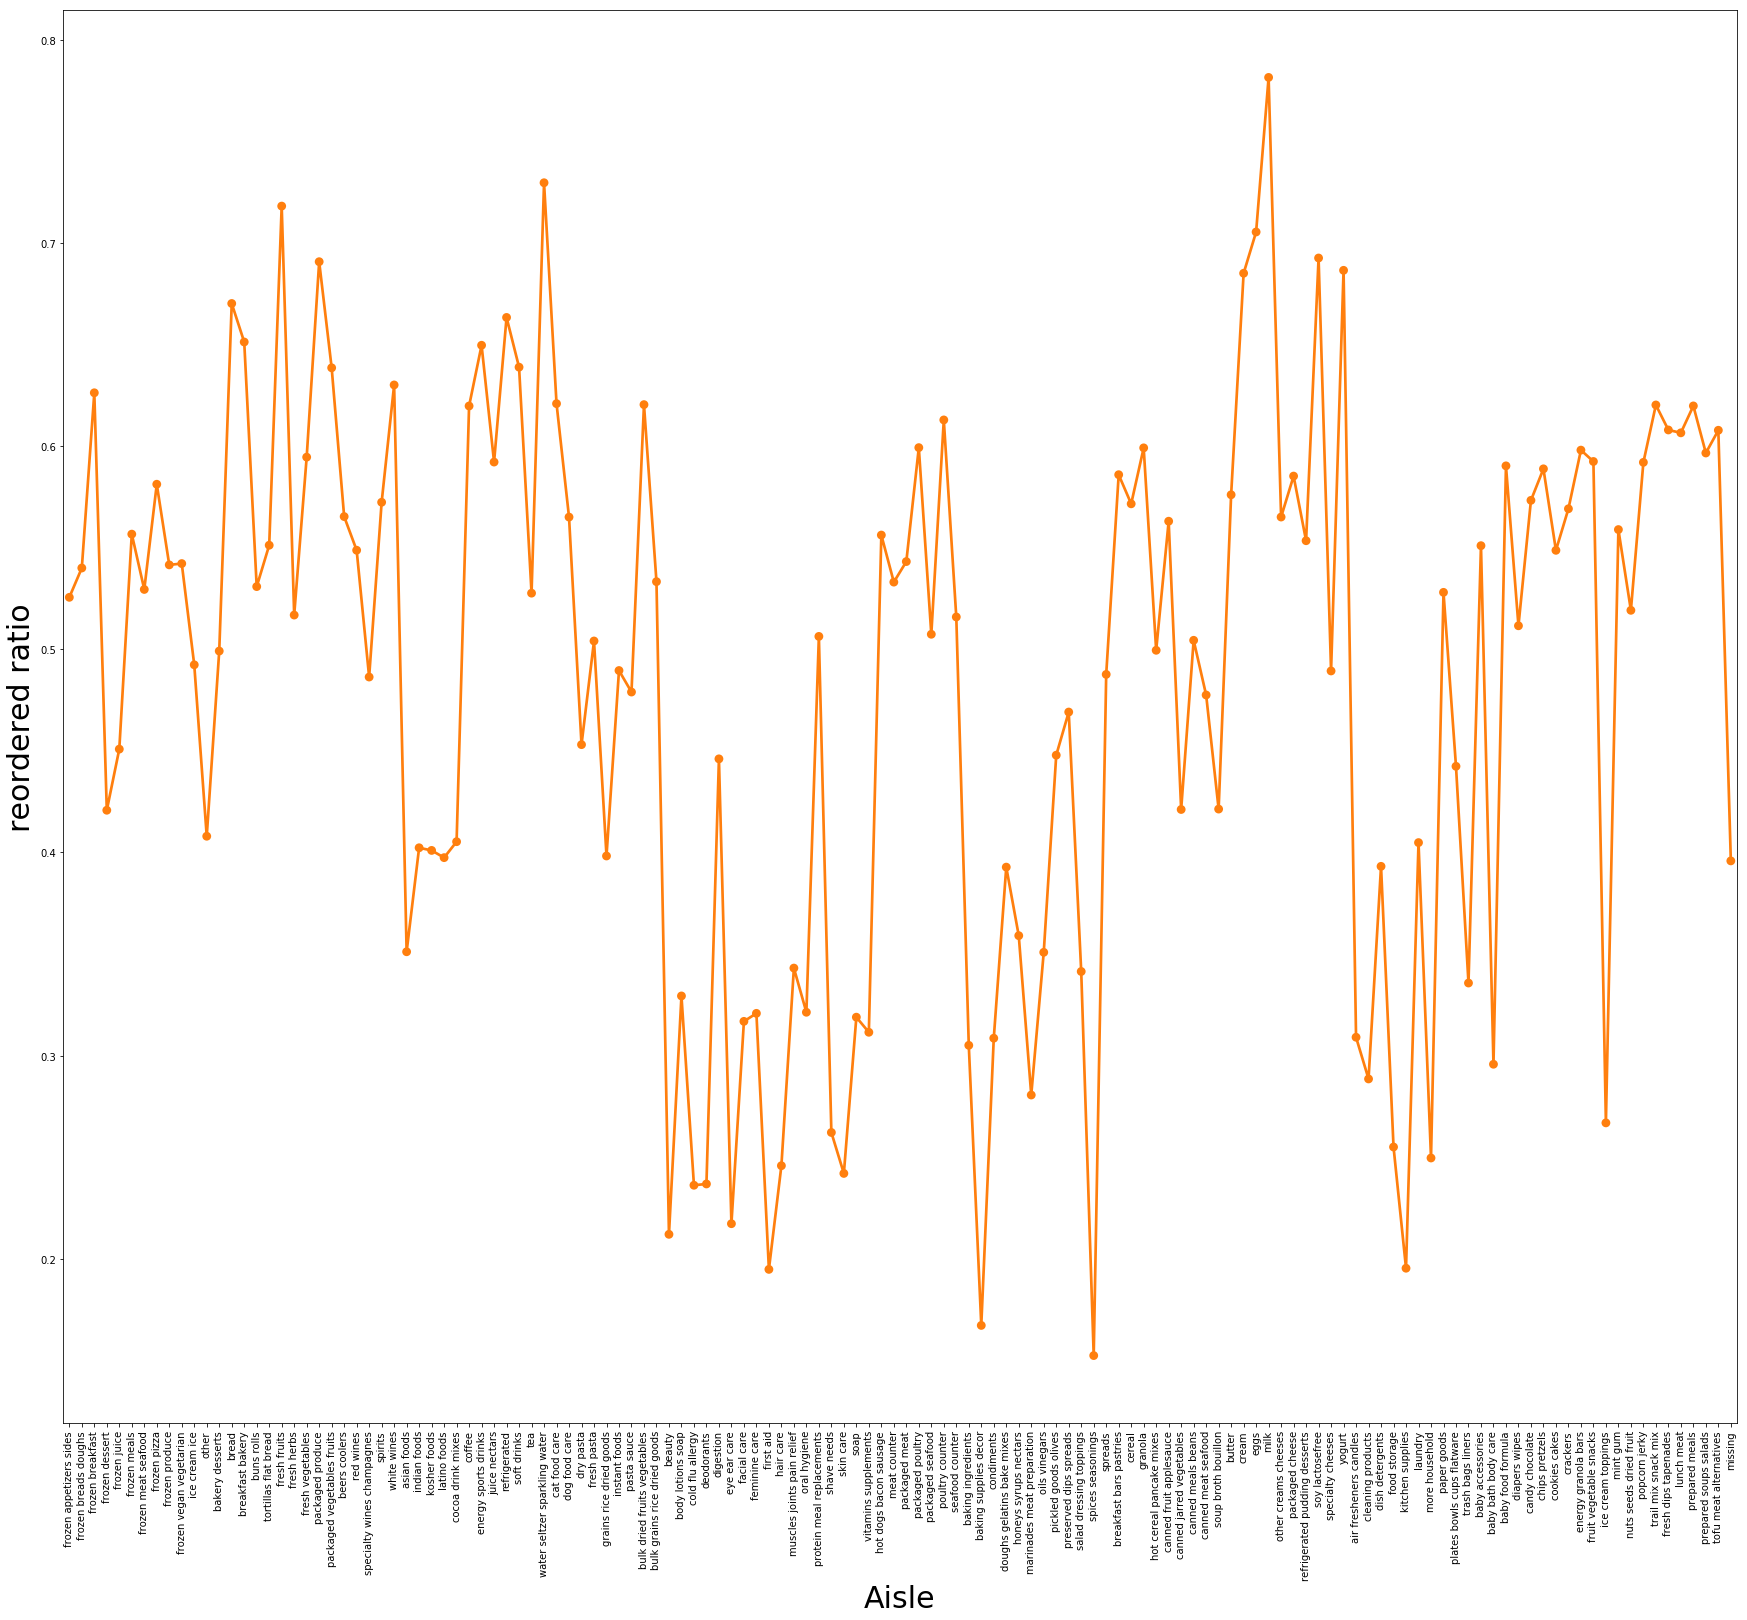

In [100]:
### Aisle wise reorder ratio
aisle_reorder = order_product_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()
plt.figure(figsize = (30,26))
sns.pointplot(aisle_reorder['aisle'].values, aisle_reorder['reordered'].values, alpha = 0.8, color =color[1])
plt.xlabel("Aisle", fontsize = 30)
plt.ylabel("reordered ratio", fontsize = 30)
plt.xticks(rotation = 'vertical')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


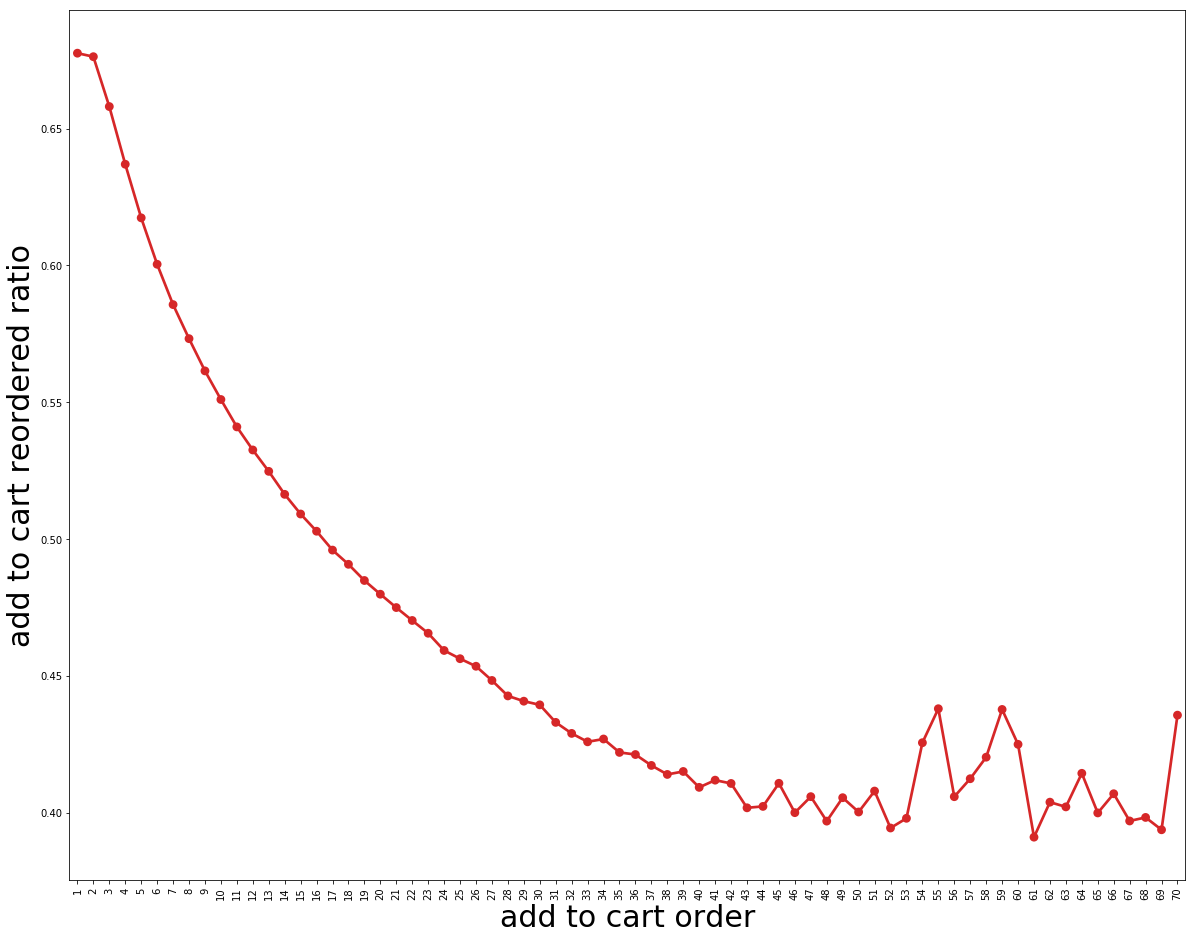

In [105]:
### lets look at how add to cart impacts on reorder ratio
order_product_df['add_to_cart_order'].ix[order_product_df['add_to_cart_order']>70] = 70
add_to_cart_df = order_product_df.groupby(['add_to_cart_order'])['reordered'].aggregate('mean').reset_index() 
plt.figure(figsize = (20,16))
sns.pointplot(add_to_cart_df['add_to_cart_order'].values, add_to_cart_df['reordered'].values, alpha = 0.8, color =color[3])
plt.xlabel("add to cart order", fontsize = 30)
plt.ylabel("add to cart reordered ratio", fontsize = 30)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
### from above fig it is clear that products added to cart initially (1-10) has higher chances(ratio is more) 
### of ordering it again ,in general its obvious 

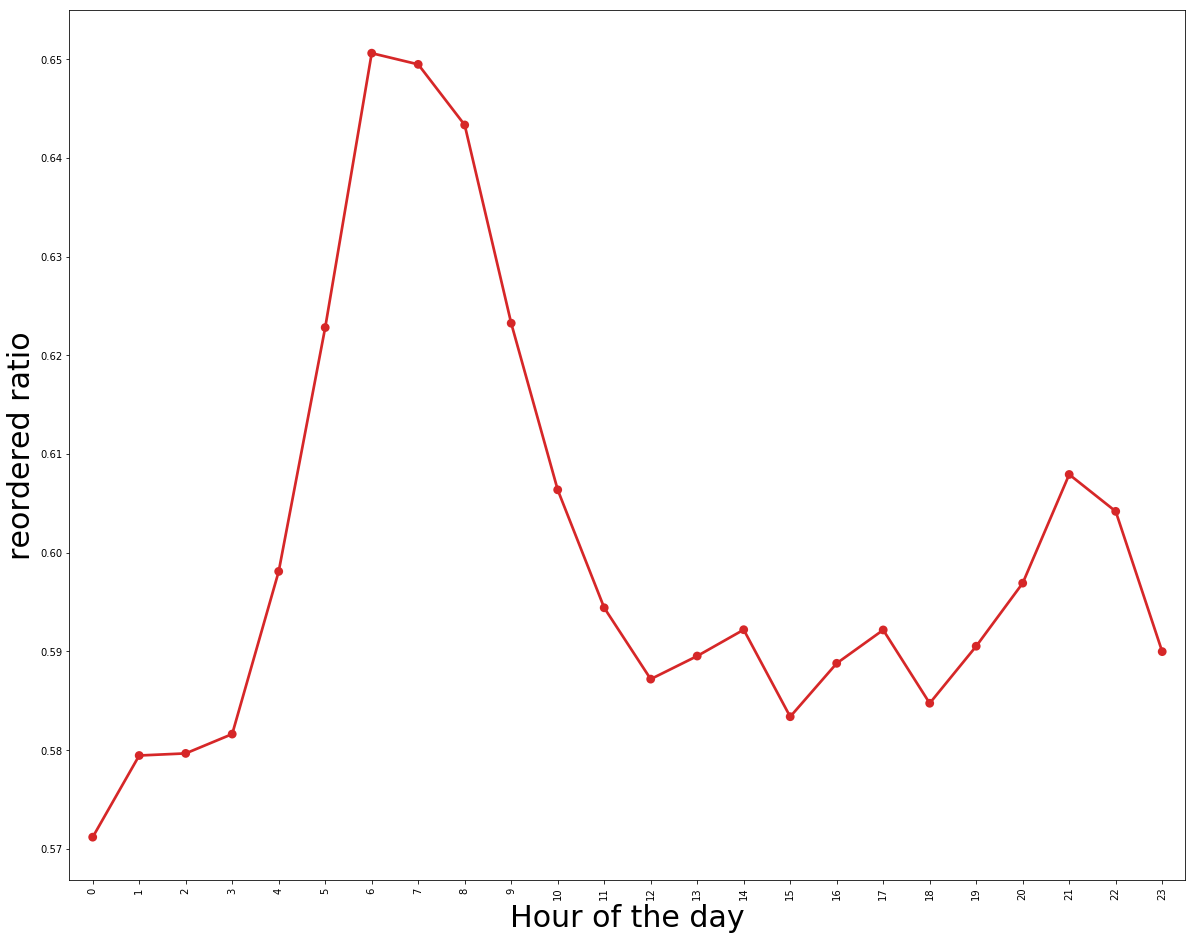

In [112]:
### reorder ratio by taking time as variable
order_product_df = pd.merge(order_train, orders_data , on  = 'order_id', how = 'left')
reorder_time_df = order_product_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
plt.figure(figsize = (20,16))
sns.pointplot(reorder_time_df['order_hour_of_day'].values, reorder_time_df['reordered'].values, alpha = 0.8, color =color[3])
plt.xlabel("Hour of the day", fontsize = 30)
plt.ylabel("reordered ratio", fontsize = 30)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
### from figure its evident that reorders mostly happn in early morning hrs , as most of the stores
### restaurants and other business buy same products early in the mornings like produce, diary and vegetables etc.,